###### Author: Basit Rohan
###### Tools: numpy, pandas, matplotlib, seaborn, linear regression

### Pubg Prediction Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Pubg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons                    41 non-null     object 
 1   Date                       41 non-null     object 
 2   KD                         41 non-null     float64
 3   Total Eliminations         41 non-null     int64  
 4   Wins                       41 non-null     int64  
 5   Top 10                     41 non-null     int64  
 6   Matches Played             41 non-null     int64  
 7   Server                     41 non-null     object 
 8   Win Ratio                  41 non-null     object 
 9   Total Damage               41 non-null     float64
 10  Total Assists              41 non-null     int64  
 11  Headshots                  41 non-null     int64  
 12  Longest Travel             41 non-null     float64
 13  Highest Damage in a match  41 non-null     int64  
 

In [3]:
df.describe()

,KD,Total Eliminations,Wins,Top 10,Matches Played,Total Damage,Total Assists,Headshots,Longest Travel,Highest Damage in a match,Average Damage,Most Elimination,Average assists
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,2.853659,339.097561,30.414634,127.878049,158.951220,58551.575610,85.121951,60.707317,13.536585,1663.585366,477.541463,11.097561,0.673171
std,1.941017,223.318920,23.538241,101.928699,131.134654,38467.923195,62.495278,43.638426,4.922792,929.204848,312.507749,6.378890,0.583106
min,0.700000,5.000000,0.000000,2.000000,2.000000,919.400000,0.000000,0.000000,1.000000,545.000000,123.900000,4.000000,0.000000
25%,1.400000,155.000000,10.000000,55.000000,73.000000,26457.300000,34.000000,30.000000,10.400000,1049.000000,268.200000,6.000000,0.200000
50%,2.200000,329.000000,27.000000,98.000000,118.000000,60222.800000,76.000000,51.000000,13.700000,1302.000000,391.000000,9.000000,0.500000
75%,4.100000,475.000000,40.000000,170.000000,199.000000,84462.000000,125.000000,76.000000,16.900000,2565.000000,659.500000,17.000000,0.800000
max,7.200000,928.000000,108.000000,503.000000,678.000000,171586.400000,243.000000,190.000000,24.200000,3670.000000,1173.100000,26.000000,2.200000


In [6]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Encoded columns:", cat_cols)

Encoded columns: Index(['Seasons', 'Date', 'Server', 'Win Ratio', 'Accuracy', 'Top 10 rate',
       'Headshot rate', 'Played on', 'Most Played Map'],
      dtype='object')


In [8]:
#features engineering + selection
# Create engineered features
df["eliminations_per_match"] = df["Total Eliminations"] / (df["Matches Played"] + 1)
df["damage_per_win"] = df["Total Damage"] / (df["Wins"] + 1)
df["assist_contribution"] = df["Total Assists"] / (df["Total Eliminations"] + 1)

# Replace any infinite or NaN values from division
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Choose input features (original + engineered)
features = [
    "Matches Played", "Top 10", "Average Damage",
    "Total Assists", "Accuracy", "Headshot rate",
    "eliminations_per_match", "damage_per_win", "assist_contribution"
]

X = df[features]
y = df["Wins"]

In [9]:
# Cell 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Cross-validation R² scores: [ 0.87112376  0.90496789  0.90145674  0.94448395  0.80963964  0.67517155
 -0.31906304  0.94439228  0.93332769  0.78687943]
Average R²: 0.7452379880863951


C:\Users\ALI PC\AppData\Local\Temp\ipykernel_7068\1813655950.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, 11)), y=cv_scores, palette=['red' if x < 0 else 'green' for x in cv_scores])


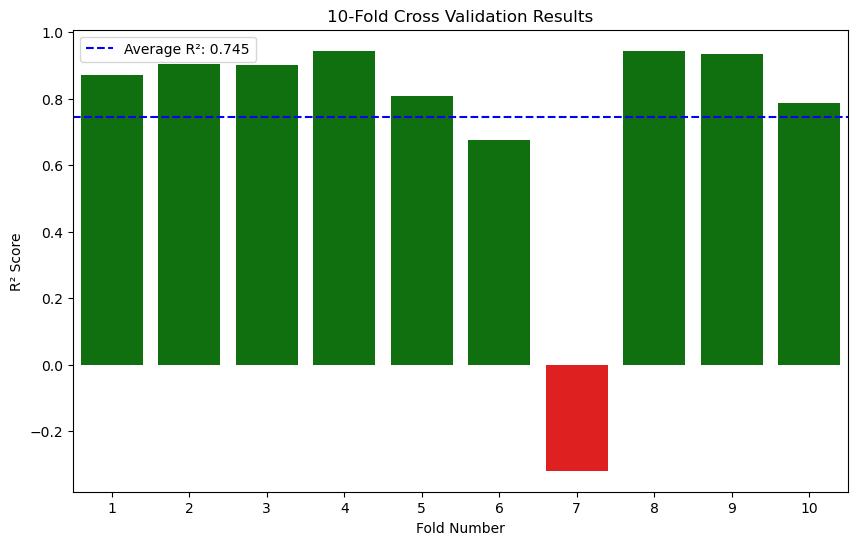

In [ ]:
# Cell 5: K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
average_r2 = np.mean(cv_scores) 
print("Cross-validation R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, 11)), y=cv_scores, palette=['red' if x < 0 else 'green' for x in cv_scores])
plt.axhline(y=average_r2, color='blue', linestyle='--', label=f'Average R²: {average_r2:.3f}')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.title('10-Fold Cross Validation Results')
plt.legend()
plt.show()


In [13]:
# Cell 6: Train Final Model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Test R²: 0.889265011490774
Test RMSE: 7.782013545794849


                  Feature  Coefficient
6  eliminations_per_match     8.019328
5           Headshot rate     0.319912
4                Accuracy     0.220785
1                  Top 10     0.139441
3           Total Assists     0.128889
0          Matches Played     0.005715
7          damage_per_win    -0.008782
2          Average Damage    -0.029277
8     assist_contribution    -6.448692


C:\Users\ALI PC\AppData\Local\Temp\ipykernel_7068\998441119.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=importance, palette="coolwarm")


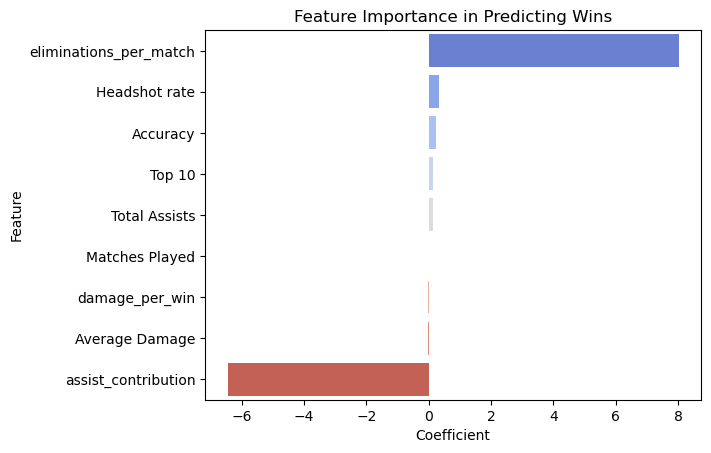

In [14]:
# Cell 7: Feature Importance (Coefficients)
importance = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(importance)

# Plot feature importance
sns.barplot(x="Coefficient", y="Feature", data=importance, palette="coolwarm")
plt.title("Feature Importance in Predicting Wins")
plt.show()


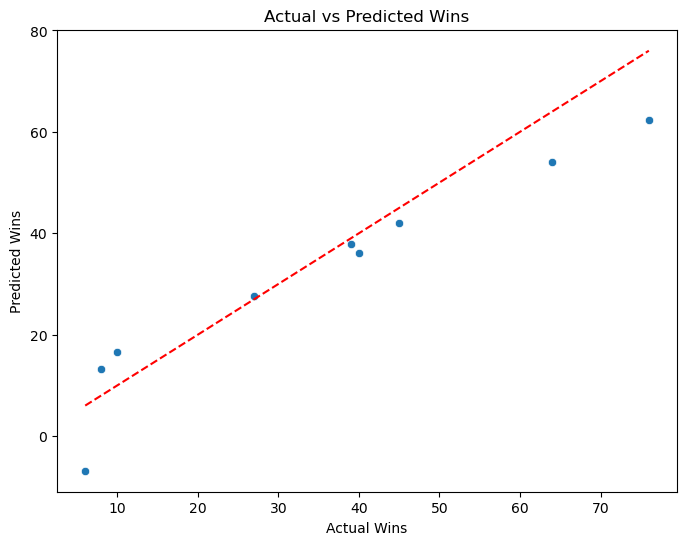

In [15]:
# Cell 8: Predicted vs Actual Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.title("Actual vs Predicted Wins")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()
